# Day 16 In-Class Assignment: (Thoughtfully) fitting models to data 
---

### <p style="text-align: right;"> &#9989; Joseph Burke.</p>

#### <p style="text-align: right;"> &#9989; 10.</p>

<img src="https://imgs.xkcd.com/comics/curve_fitting_2x.png" style="float: left; padding: 0px 30px 0px 30px;" width=350>

In this assignment we're going to look at how we might use a meaningful model to understand data.

The **learning goals** of the assignment are to:
* Discuss the role that models play in our understanding of the world around us and how models can be used to make predictions.
* Practice using the SciPy `curve_fit()` function to fit a specific model to data
* Interpret the results of our best fit model
* Use our best fit model to calculate new values and forecast future behavior

### Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.


Image from: https://xkcd.com/2048/

---
## 1. Thinking about models and how they help us understand the world around us

&#9989;&nbsp; **In your groups**, take turns providing examples of previous experiences you've had that involved a model (or models) of one form other another. These can be experiences from current or prior courses (outside of CMSE 201!) or experiences from your personal life or from work.

When sharing your example, **you should**:
* Explain the real-world context of the model and what the basic components of the model are.
* Identify and explain any assumptions that are built into the model or limitations of the model (i.e. where might the model breakdown?).

For example: I have a model for how my retirement savings will grow as a function of time and I can use this model to predict how much money I will have when I retire or to understand how early I might be able to retire given the financial needs I will have during my retirement. Assumptions that are built into my retirement model include things like the health of the economy over time and how much money (if any) I might receive from social security when I retire. The accuracy of my model is only as good as the assumptions I base it off of.

&#9989;&nbsp; **Record the details you shared with your group in the cell below**. There will be an opportunity to share out some of these examples as a class.

<font size=+3>&#9998;</font> *Predicting weather by looking at the time of year and the temperature, and the time of year and precipitation.  For planning travel. For identifying how drug use affects lifespan.

---
## 2. Using Python to fit specific models to data

In the section that follows, we will practice using Python to fit a model to provided data. When doing so, it is important to think about whether or not these model fits the data well and what information about the data is provided by the model we use.

### Revisiting population growth

In a previous in-class assignment you created a function **based on a model** to project population growth as a function of time based on an initial population, a carry capacity, and a growth rate coefficient. Let's quickly revisit the mathematical logistic growth model for growth of a population:

$$P(t) = \frac{C}{1 + Ae^{-kt}}$$

where 

$$A = \frac{C-P_{init}}{P_{init}}$$

The variable $C$ represents the *carrying capacity* of the population, which is the maximum population that the environment can sustain, and $k$ is the relative growth rate coefficient (the larger $k$ is, the faster the population will grow initially). $P_{init}$ is the initial value of the population at $t=0$.

#### Understanding a logistic growth model

Here are several logistic growth models for when the initial population, $P_{init}$, is **1 billion** but the the carrying capacity, $C$, and the growth rate coefficient, $k$, are varied.

The **first** plot on the keeps $P_{init}$ and $k$ fixed while changing $C$, and the **second** plot on the keeps $P_{init}$ and $C$ fixed while changing $k$.

<div align="center">
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-14/population_models_bigC.png" alt="population-models-big-C" border="0">
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-14/population_models_littlek.png" alt="population-models-littlek" border="0">
</div>

&#9989;&nbsp; Questions to make sure you **answer with your group**:
1. What is the impact of $P_{init}$, the initial population, in the model? How would the curves change if you changed this value?
1. What is the impact of $C$, the carrying capacity, in the model? How does this parameter control the shape of the curves in the plot above?
2. What is the impact of $k$, the growth rate coefficient, in the model? How does this parameter control the shape of the curves in the plot above?

Pay special attention to the values for the parameters that made these curves -- they may useful in the next part of the activity!

<font size=+3>&#9998;</font> *1: P init determines how much room we have for growth relative to the carrying capacity, and is also a factor in how quickly the population grows, as a billion people can't come very quickly from 4. 2: C affects the maximum population.  It is a near absolute cap of how big the population can get.  3: k, the growth coefficient, is related to how quickly and how many kids people are having, and death rates as well, and it directly affects the slope.*

#### Can we use this model to understand some population data?

In the file, `pop200.csv`, you'll find some data for 200 years of population growth for an unknown civilization.

&#9989;&nbsp; Your goal is to **work with your group** to determine if the population growth model presented above is a good approximation for the data that we’ve provided you and what the best fit parameters for that model are:

1. Load the data into your Jupyter notebook and make a plot of the **data alone**. Visualizing your data is always a good first step!
<br>
2. (Re)Create a function for calculating population as a function of time using the mathematical model provided above. You should have created such a model previously in the course!
    - Your function needs to take the following arguments in the following order: an array of time values; the initial population, $P_{init}$; the carrying capacity, $C$; and the growth rate coefficient, $k$.
    - Your function needs to **return** an array of the population values.
    - For reference, here is the mathematical representation of the function again:
    $$P(t) = \frac{C}{1 + Ae^{-kt}}$$

    where 

    $$A = \frac{C-P_{init}}{P_{init}}$$
    
     **Note**: the letters chosen to represent the model parameters have been changed slightly to avoid the confusion of having multiple "K" values, we'll also just assume that our model starts always at $t=0$, to the model no longers need a $t_0$ parameter. Variations in how models are defined are common and it's good practice to adapt your code to match a modified model.
<br>
3. Use SciPy's [`curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function to determine a best fit set of model parameters using your function and the provided data.
    - When you first try running `curve_fit()`, you might get a warning and you might get results that don't make sense. Sometimes `curve_fit()` will fail to find a good fit if the initial guess for the best fit parameters is too far off. How would you fix this? Look at the [documentation for `curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), especially the `p0` argument, and see if you and your group can figure out how to overcome this issue. What might be reasonable starting guesses for the initial populuation and the carrying capacity? **Hint**: revisit the plot from above and the parameters that were used to make those models.

<br>
4. Make a plot of the data as well as a expected values based on your best fit model parameters.
    - Your plot should plot population (in billions) on the y-axis and time (in years) on the x-axis. Make sure you include appropriate axis labels.
    - Your plot should use a legend to identify what parts of the plot constitute the data and what part represents the expected values from your model.

Text(0, 0.5, 'pop')

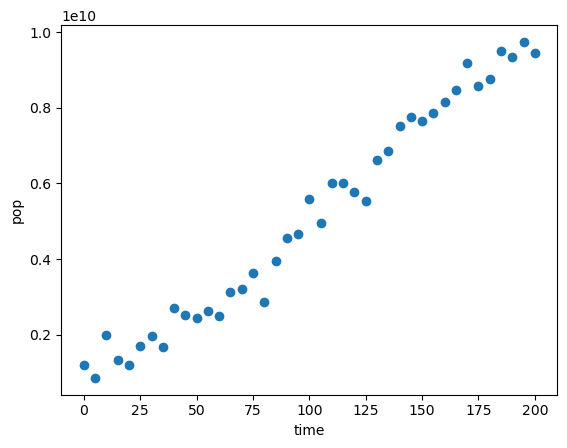

In [1]:
# Put your code here. Create additional code cells as is useful for necessary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

pop = pd.read_csv('pop200.csv')
x=pop['time']
y=pop['population']
plt.scatter(x,y)
plt.xlabel('time')
plt.ylabel('pop')


In [2]:

def population (time,P, C, k):
    return C / (1 + ( (C-P) /P ) * (np.e ** (-k * time)))


[1.05555913e+09 1.15288905e+10 1.99605420e-02]


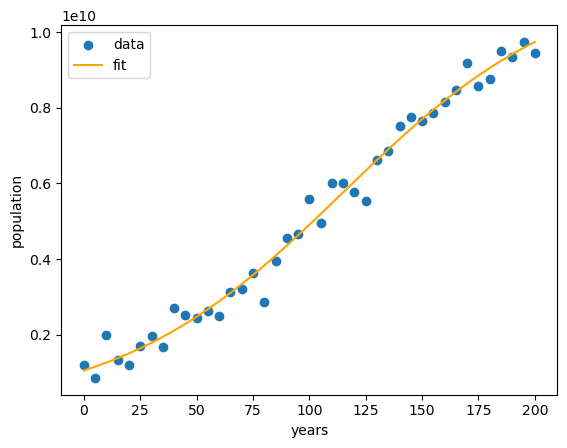

In [15]:

# Use curve_fit by passing in the function, x data, and y data
best_fit_parameters, just_ignore_this_for_now = curve_fit(population, x, y,[1000000000,12000000000,.05])

# Print the array of fitted parameter values
print(best_fit_parameters)

# Unpack the parameter results into separate variables so that we can feed them to our sine function
P_fit = best_fit_parameters[0]  # get fitted P value
C_fit = best_fit_parameters[1]  # get fitted C value
k_fit = best_fit_parameters[2]  # get fitted K value

# use my_sin_function with new parameters to get fitted y values
y_pop_fit = population(x, P_fit, C_fit, k_fit)


# plot our actual data
plt.scatter(x, y, label = "data")

# plot our fitted curve
plt.plot(x, y_pop_fit, color = "orange", label = "fit")

plt.legend()
plt.xlabel('years')
plt.ylabel('population')
plt.show()

#### Interpreting your results and using your model to calculate expected values.

&#9989;&nbsp; Now that you've modeled the data using your logistic growth model, use your results to answers the following questions.

1. What does your model estimate as being the initial population for this civilization?
2. What does your model estimate as being the carry capacity of the population?
3. Using your model and the best fit parameters, calculate the expected population for this civilization at:
    - 177 years
    - 256 years

Ask your group for help if you're not sure how to find these answers.



<font size=+3>&#9998;</font> *Put your answers here.*

In [4]:
# Or use code to print out your answers
print(population(177,P_fit,C_fit,k_fit))
print(population(256,P_fit,C_fit,k_fit))


8937887776.043531
10877373156.532509


#### Using your model to forecast future values

&#9989;&nbsp; Using your model and the best-fit parameters, generate a new plot that shows the expected values for **every year for the first 300 years** of the civilization. Overplot the data you have for the first 200 years of growth.




In [5]:
xlist =list(range(0,301,5))
xvals = pd.Series(xlist,index = list(range(len(xlist))))

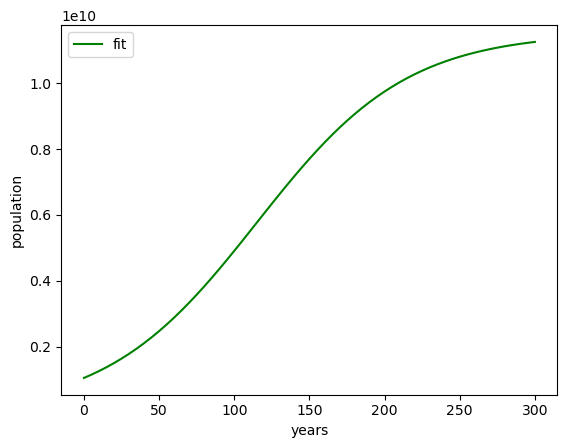

In [13]:
# Put your code here

yvals = population(xvals, P_fit, C_fit, k_fit)
plt.plot(xvals, yvals, color = "green", label = "fit")
plt.legend()
plt.xlabel('years')
plt.ylabel('population')
plt.show()

#### Comparing forecasted values to new data

&#9989;&nbsp; Now that you've predicted the growth of the population for a full 300 years, grab the `pop300.csv` data file which contains the most recent data available for this civilization, read it into your notebook and plot it along with your expected values.

In [7]:
# Put your code here
pop300 = pd.read_csv('pop300.csv')
pop300.head()

,time,population
0,0,1191119990
1,5,855597305
2,10,1984086146
3,15,1325169013
4,20,1194393073


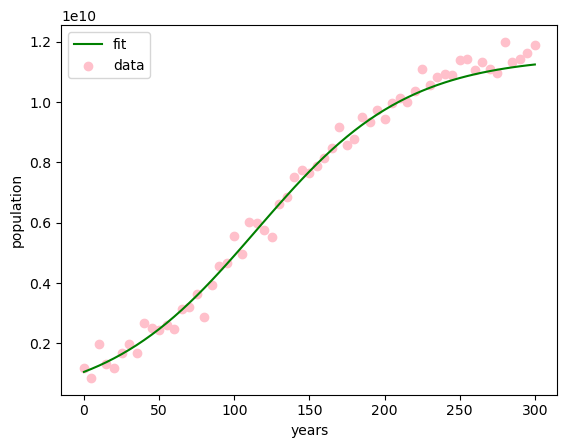

In [16]:
x300 = pop300['time']
y300 = pop300['population']
plt.plot(xvals, yvals, color = "green", label = "fit")
plt.scatter(x300,y300, color = 'pink', label = 'data')
plt.legend()
plt.xlabel('years')
plt.ylabel('population')
plt.show()

&#9989;&nbsp; **Question**: Do you still feel like the model is a good fit to the population data for this civilization? Explain why or why not. Are their any parameters of your model that seem particularly inaccurate given the new data?

<font size=+3>&#9998;</font> *The model does a good job but it is lower than expected towards the top.  It may look different with a higher C value.*

#### Updating your model based on new data

Regardless of whether or not you think your current model is a good fit to the data, it's always worth checking to see if the new data provides a different set of best fit parameters. Folks who build and use models to understand the world around them are constantly using new data to revise and improve their models.

&#9989;&nbsp; Try recalibrating your best fit parameters by running `curve_fit` on the new data you've been provided. Then answer the following questions:
1. Which parameter(s) changed the most when you re-fit your model to the data?
2. Do any shifts you find in the parameter values agree with your "by eye" assessment of how well the model fit the data? Explain why or why not.

In [33]:
# Put your code here

# Use curve_fit by passing in the function, x data, and y data
best_fit_parameters, just_ignore_this_for_now = curve_fit(population, x300, y300,[1000000000,12000000000,.015])

# Print the array of fitted parameter values
print(best_fit_parameters)


[1.10136951e+09 1.19986489e+10 1.91181311e-02]


<font size=+3>&#9998;</font> *from [1.05555913e+09 1.15288905e+10 1.99605420e-02]    to  [1.10136951e+09 1.19986489e+10 1.91181311e-02],  P increased by 5*10^8, C increased by 5*10^8, and k decreased very slightly.*

&#9989;&nbsp; Now that you have a new set of best fit parameters, make one final plot that shows the true glory of your expected model values along with the full set of data.

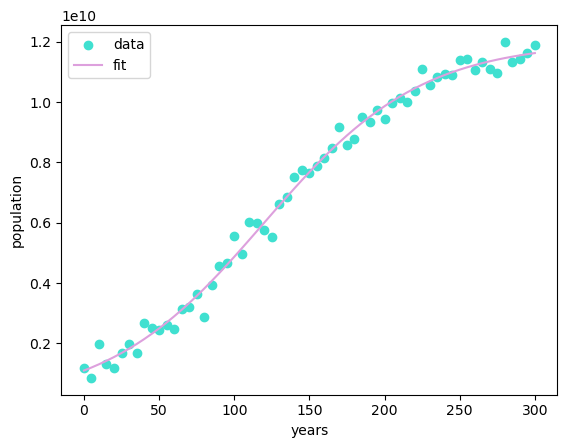

In [32]:
# Put your code here.
# Unpack the parameter results into separate variables so that we can feed them to our sine function
P_fit = best_fit_parameters[0]  # get fitted P value
C_fit = best_fit_parameters[1]  # get fitted C value
k_fit = best_fit_parameters[2]  # get fitted K value

# use my_sin_function with new parameters to get fitted y values
y_pop_fit = population(x300, P_fit, C_fit, k_fit)


# plot our actual data
plt.scatter(x300, y300, color='turquoise',label = "data")

# plot our fitted curve
plt.plot(x300, y_pop_fit, color = "plum", label = "fit")

plt.legend()
plt.xlabel('years')
plt.ylabel('population')
plt.show()


---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [11]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023,  [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.